Importing the Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

Importing dataset

In [4]:
link = 'http://bit.ly/w-data'
df = pd.read_csv(link)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Visualization

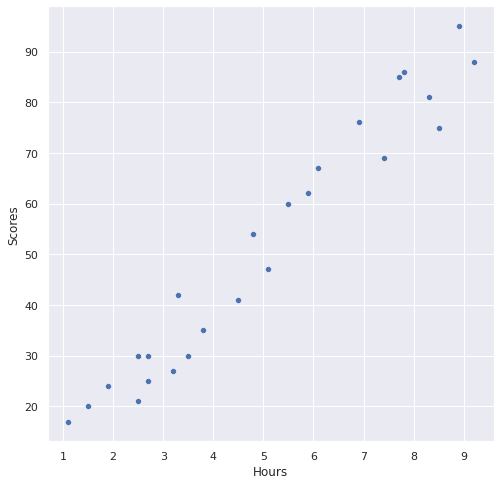

In [41]:
sns.scatterplot(data = df,
                x = 'Hours',
                y = 'Scores')
sns.set(rc={'figure.figsize':(10,10)})

Data Pre-processing

In [6]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Modeling

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
y_pred = regressor.predict(x_test)

Visualizing results

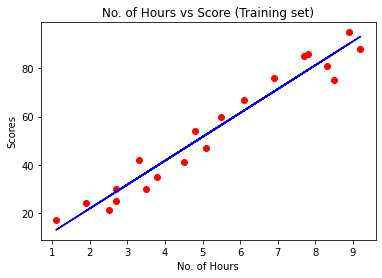

In [15]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('No. of Hours vs Score (Training set)')
plt.xlabel('No. of Hours')
plt.ylabel('Scores')
plt.show()

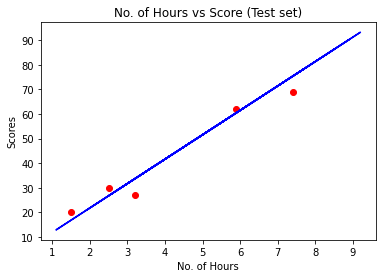

In [17]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('No. of Hours vs Score (Test set)')
plt.xlabel('No. of Hours')
plt.ylabel('Scores')
plt.show()

In [44]:
print("The tested vs predicted value is")
np.set_printoptions(precision=2)
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)),1))

The tested vs predicted value is
[[20.   16.88]
 [27.   33.73]
 [69.   75.36]
 [30.   26.79]
 [62.   60.49]]


Prediction and Evaluation

In [30]:
prediction = regressor.predict([[9.25]])
print("The student will get a score of {} if he/she studies 9.25hours/day ".format(prediction))

The student will get a score of [93.69] if he/she studies 9.25hours/day 


In [37]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
r2_test = metrics.r2_score(y_test, y_pred)
print("The mean Absolute error is {}".format(MAE))
print("The R2 score is {}".format(r2_test))

The mean Absolute error is 4.183859899002982
The R2 score is 0.9454906892105354
